# Codeforces Performance Analyzer

## How to use
1. Enter your username in the form below
2. Hit Ctrl + F9
3. Scroll down to view plots

## Troubleshoting
Runtime -> Change runtime type -> Python3

## Want to contribute?
[Click here](https://github.com/CAMP-IIITB/Performance-Analyzer)

In [0]:
#@markdown ##Enter CF handle below
user = 'toxic_hack' #@param

## Imports

In [0]:
from typing import Dict, Tuple, Text

import requests
import json

import datetime
import matplotlib.pyplot as plt

import numpy as np

##Implementation

### Retrieve ACs

In [0]:
def get_accepted_problems_dict(submissions: Dict) -> Dict[Tuple[Text, Text], int]:
  ac_problems_ratings = {}
  ac_problems_submission_time = {}
  ac_tags = {}
  
  for submission in submissions:
    if submission['verdict'] != 'OK':
      continue
    submission_time = submission['creationTimeSeconds']
    problem = submission['problem']
    if 'rating' not in problem:
      continue
    
    contest_id = problem['contestId']
    problem_index = problem['index']
    problem_rating = problem['rating']
    problem_tags = problem['tags']
    
    problem_id = (contest_id, problem_index)
    if problem_id in ac_problems_ratings:
      assert ac_problems_ratings[problem_id] == problem_rating
    else:
      ac_problems_ratings[(contest_id, problem_index)] = problem_rating
      ac_problems_submission_time[(contest_id, problem_index)] = submission_time
      
      for tag in problem_tags:
        if tag not in ac_tags:
          ac_tags[tag] = set()
        ac_tags[tag].add((contest_id, problem_index))
      
  return ac_problems_ratings, ac_problems_submission_time, ac_tags

### AC Statistics

In [0]:
def get_ac_statistics(ac_problems_ratings: Dict[Tuple[Text, Text], int]):
  ratings = list(ac_problems_ratings.values())

  fig, axes = plt.subplots(1, 2, figsize=(20, 5))
  # Histogram of ratings
  _ = axes[0].hist(ratings)
  _ = axes[0].set_xlabel('problem ratings')
  _ = axes[0].set_ylabel('frequency')
  _ = axes[0].set_title('Problem ratings.')

  # Mean and median problem rating
  mean_rating, median_rating = np.mean(ratings), np.median(ratings)
  print('Mean difficulty =', mean_rating)
  print('Median difficulty =', median_rating)

  # Top 20% hardest problems
  num_ac = len(ratings)
  top_20 = int(num_ac * 0.2 + 0.5)
  
  ratings.sort()
  hardest_20 = ratings[-top_20:]

  hard_mean_rating, hard_median_rating = np.mean(hardest_20), np.median(hardest_20)

  # Histogram of ratings of hardest 20
  _ = axes[1].hist(hardest_20, color='r')
  _ = axes[1].set_xlabel('problem ratings')
  _ = axes[1].set_ylabel('frequency')
  _ = axes[1].set_title('Top 20% hardest problem rating.')

  print('Hard mean difficulty =', hard_mean_rating)
  print('Hard median difficulty =', hard_median_rating)

### Time Series


In [0]:
def get_point_colors(values, rating_bars, color_map):
  colors = []
  for value in values:
    for r in rating_bars:
      if value <= r:
        colors.append(color_map[r])
        break
  return colors
  
def get_ac_problem_time_series(ac_problems_ratings, ac_problems_submission_time):
  problems = ac_problems_ratings.keys()

  dates = [ac_problems_submission_time[problem] for problem in problems]
  dates = [datetime.datetime.fromtimestamp(ts) for ts in dates]

  values = [ac_problems_ratings[problem] for problem in problems]

  fig, ax = plt.subplots(1, 1, figsize=(20, 5))
  
  # Map problem difficulties to colors
  colors = ['gray', 'green', 'cyan', 'blue', 'purple', 'orange', 'red', 'black']
  rating_bars = [1200, 1400, 1600, 1900, 2100, 2400, 3000, 4000]
  assert len(colors) == len(rating_bars)
  color_map = {rating_bars[i]: colors[i] for i in range(len(colors))}
  
  # Assign appropriate color to each point
  colors = get_point_colors(values, rating_bars, color_map)
    
  ax.scatter(dates, values, c=colors)  
  _ = ax.set_xlabel('date')
  _ = ax.set_ylabel('problem rating')
  _ = ax.set_title('Scatter plot, difficutly vs time.')


### Tag wise analyses

In [0]:
def problem_tag_analyses(ac_problems_ratings, ac_tags):
  per_tag_rating_list = {tag: [ac_problems_ratings[problem_key] for problem_key in ac_tags[tag]] for tag in ac_tags}
    
  fig, ax = plt.subplots(1, 1, figsize=(20, 7))

  # Create a violin plot
  names = per_tag_rating_avg.keys()
  data = [per_tag_rating_list[name] for name in names]
  violin_parts = ax.violinplot(data)

  # Change colors
  for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)
  
  # Mark out the median values in each violin
  medians = [np.median(l) for l in data]
  inds = np.arange(1, len(medians) + 1)
  ax.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
  _ = ax.set_xlabel('problem tag')
  _ = ax.set_ylabel('average problem rating')
  _ = ax.set_title('Difficulty per tag')

  # Add x-axis labels and rotate by 90 degrees.
  ax.set_xticks(np.arange(1, len(names) + 1))
  ax.set_xticklabels(names)
  plt.xticks(rotation=90)


## Analyses

### Retrieve submissions

In [7]:
url = 'http://codeforces.com/api/user.status?handle=' + user + '&from=1'

response = requests.get(url=url)
response = json.loads(response.text)
submissions = response['result']

print(user, 'has made', len(submissions), 'submissions')

ac_problems_ratings, ac_problems_submission_time, ac_tags = get_accepted_problems_dict(submissions)

toxic_hack has made 1850 submissions


### Histogram of problem difficulties for all problems solved

Mean difficulty = 1619.241573033708
Median difficulty = 1600.0
Hard mean difficulty = 2218.3098591549297
Hard median difficulty = 2200.0


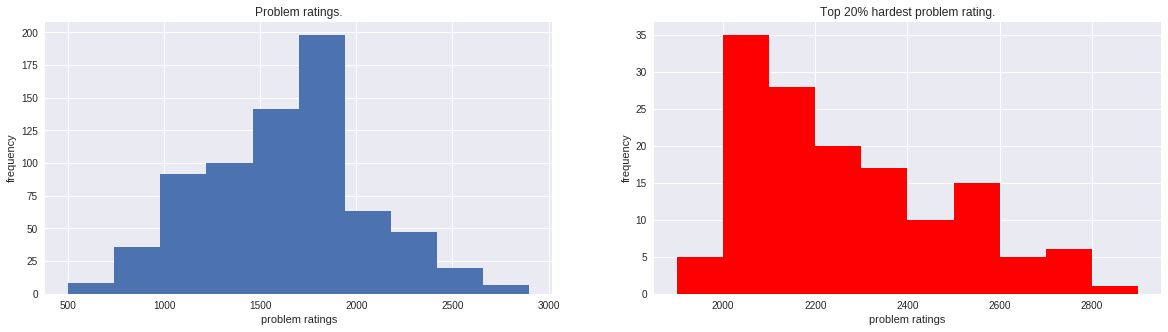

In [8]:
get_ac_statistics(ac_problems_ratings)

### Difficulty of problems solved over time 

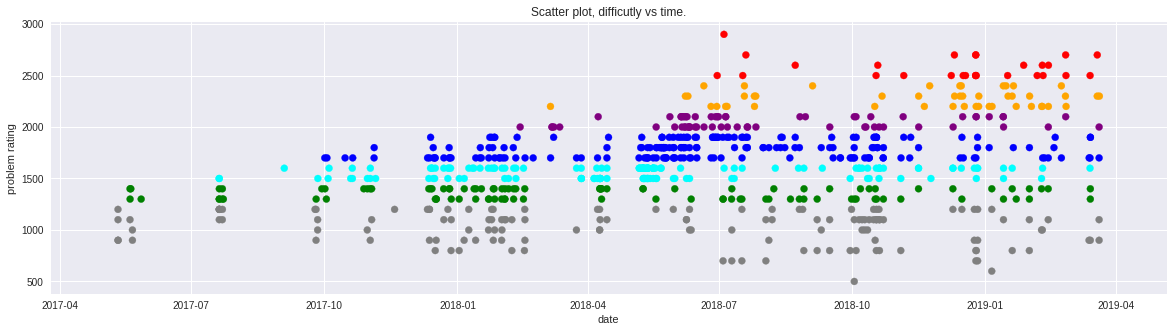

In [9]:
get_ac_problem_time_series(ac_problems_ratings, ac_problems_submission_time)

### Problem ratings per problem tag for each solved problem

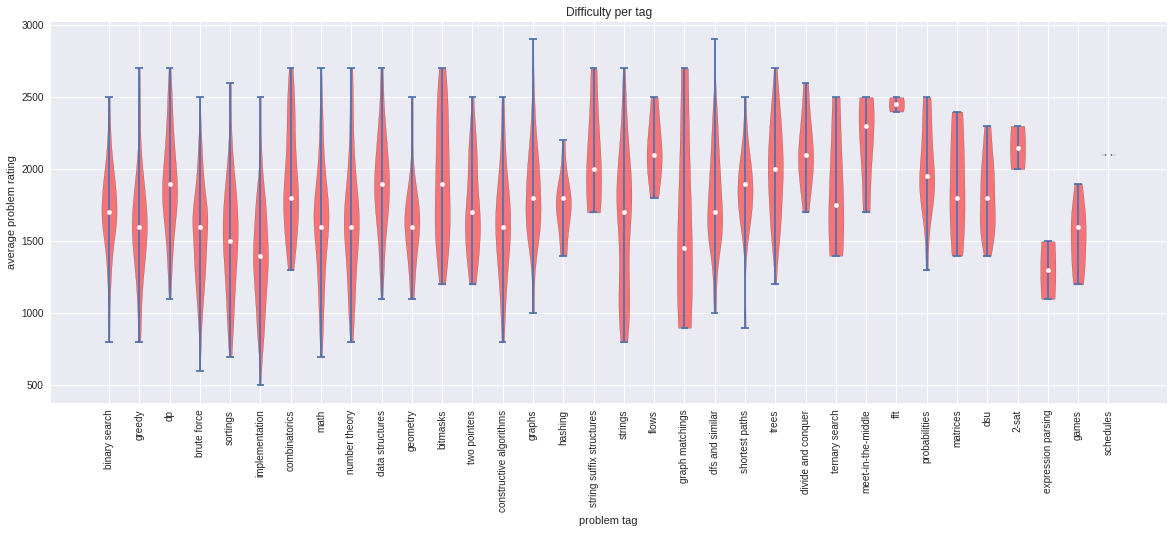

In [10]:
problem_tag_analyses(ac_problems_ratings, ac_tags)